<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/04_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다항회귀(Polynomial Regression) 기반 예측

[*********************100%***********************]  1 of 1 completed


📌 Training Mean Squared Error (MSE): 753.3942
📌 Training R-squared (R²): 0.8801
📌 Test Mean Squared Error (MSE): 183896.8055
📌 Test R-squared (R²): -51.5755


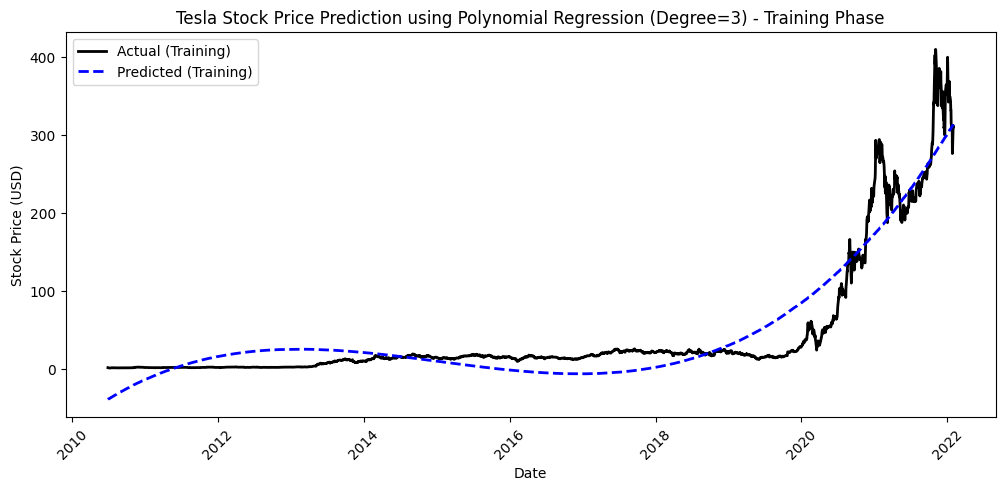

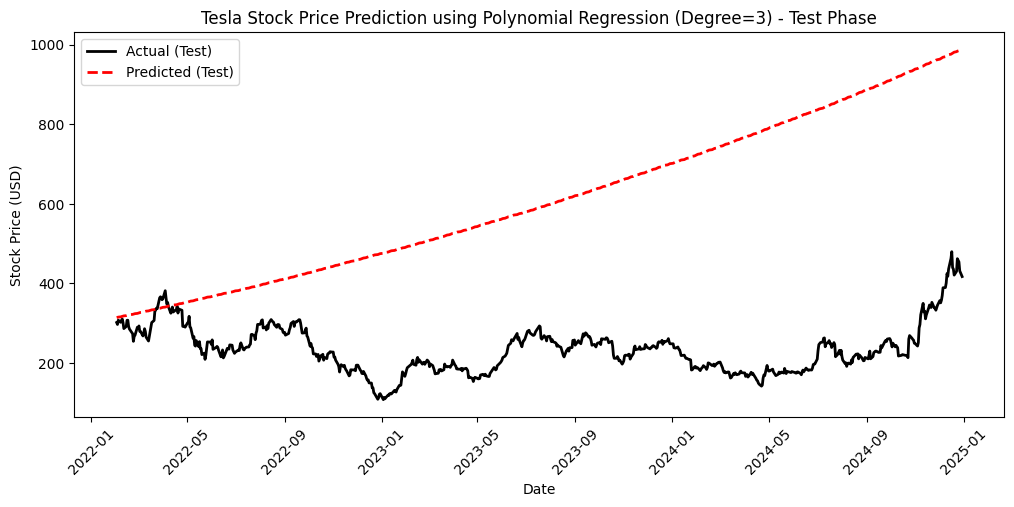

In [22]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2010-01-01", end="2024-12-31")

# 데이터프레임 변환
df = df.reset_index()

# 📌 2️⃣ Feature 생성: 날짜를 숫자로 변환
df["Day"] = np.arange(len(df))

# 📌 3️⃣ 학습(train) / 테스트(test) 데이터 분할 (80:20)
X = df[["Day"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 📌 4️⃣ 다항 회귀 모델 (Polynomial Regression) 적용
degree = 3  # 다항식 차수 (3차 다항 회귀 사용)
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 📌 5️⃣ 다항 회귀 모델 학습
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 📌 6️⃣ 예측 수행
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# 📌 7️⃣ 성능 평가
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"📌 Training Mean Squared Error (MSE): {train_mse:.4f}")
print(f"📌 Training R-squared (R²): {train_r2:.4f}")

print(f"📌 Test Mean Squared Error (MSE): {test_mse:.4f}")
print(f"📌 Test R-squared (R²): {test_r2:.4f}")

# 📌 8️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값, Line Plot 적용)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[:len(X_train)], y_train, label="Actual (Training)", color="black", linewidth=2)
plt.plot(df["Date"].iloc[:len(X_train)], y_train_pred, label="Predicted (Training)", color="blue", linestyle="--", linewidth=2)
plt.title(f"Tesla Stock Price Prediction using Polynomial Regression (Degree={degree}) - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 9️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값, Line Plot 적용)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[len(X_train):], y_test, label="Actual (Test)", color="black", linewidth=2)
plt.plot(df["Date"].iloc[len(X_train):], y_test_pred, label="Predicted (Test)", color="red", linestyle="--", linewidth=2)
plt.title(f"Tesla Stock Price Prediction using Polynomial Regression (Degree={degree}) - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# 최적 차수를 자동으로 선택하는 다항 회귀 (Polynomial Regression)

[*********************100%***********************]  1 of 1 completed


📌 최적 차수 (Best Degree): 2
📌 최적 MSE (Test Data): 4837.5158


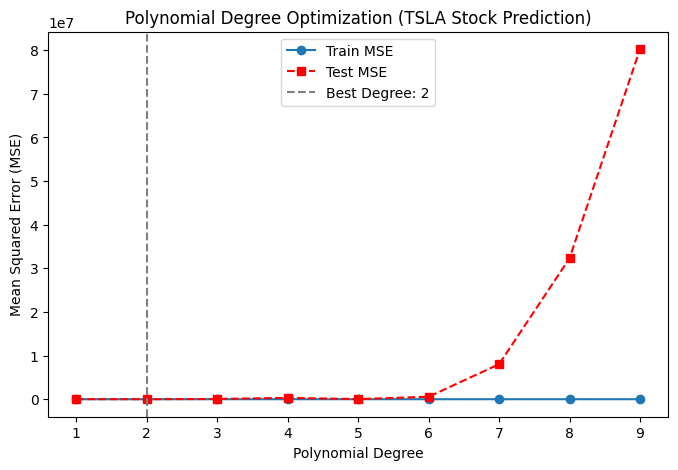

📌 최적 다항 회귀식 (텍스트 표현): y = 318.90 - 0.53x + 0.00x^2
📌 최적 다항 회귀식 (수학식 표현):


Eq(y, 0.000605054142995276*x**2 - 0.53439717579227*x + 318.903852750295)

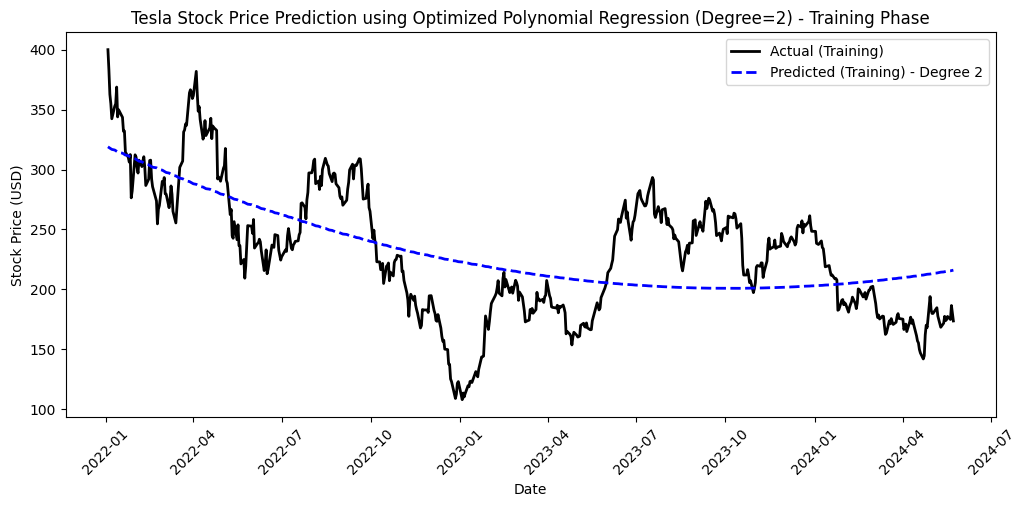

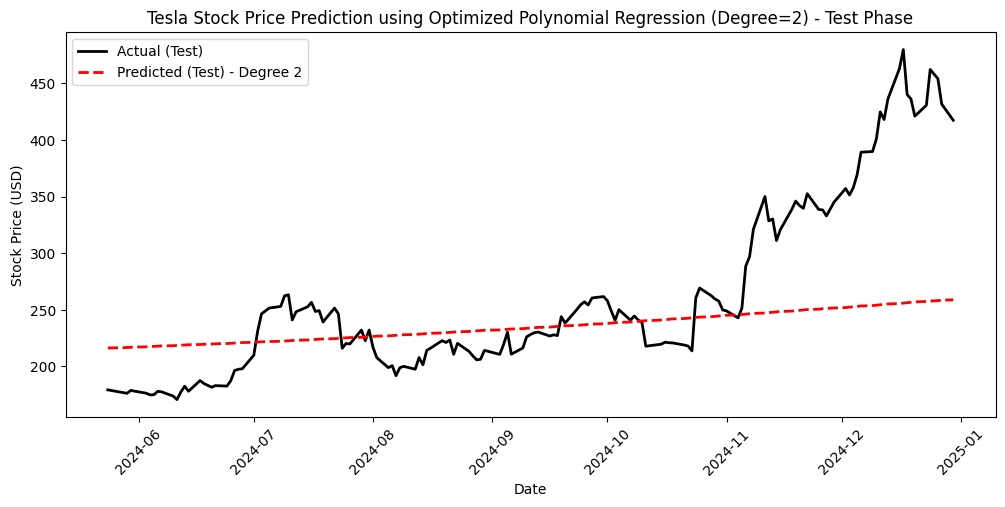

In [27]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sympy import symbols, Eq
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-12-31")

# 데이터프레임 변환
df = df.reset_index()

# 📌 2️⃣ Feature 생성: 날짜를 숫자로 변환
df["Day"] = np.arange(len(df))

# 📌 3️⃣ 학습(train) / 테스트(test) 데이터 분할 (80:20)
X = df[["Day"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 📌 4️⃣ 최적 차수(degree) 찾기
best_degree = 1
best_mse = float("inf")
best_model = None

degrees = range(1, 10)  # 다항식 차수 범위 (1~9)
train_errors = []
test_errors = []

for degree in degrees:
    # 다항 특성 변환
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # 모델 학습
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # 예측 수행
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # 성능 평가
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

    # 최적 차수 갱신
    if test_mse < best_mse:
        best_mse = test_mse
        best_degree = degree
        best_model = model
        best_poly = poly

print(f"📌 최적 차수 (Best Degree): {best_degree}")
print(f"📌 최적 MSE (Test Data): {best_mse:.4f}")

# 📌 5️⃣ 최적 차수를 사용한 예측
X_train_poly = best_poly.fit_transform(X_train)
X_test_poly = best_poly.transform(X_test)

# 모델 학습
best_model.fit(X_train_poly, y_train)

# 예측 수행
y_train_pred = best_model.predict(X_train_poly)
y_test_pred = best_model.predict(X_test_poly)

# 📌 6️⃣ 최적 차수 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, label="Train MSE", marker="o", linestyle="-")
plt.plot(degrees, test_errors, label="Test MSE", marker="s", linestyle="--", color="red")
plt.axvline(best_degree, color="gray", linestyle="--", label=f"Best Degree: {best_degree}")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Polynomial Degree Optimization (TSLA Stock Prediction)")
plt.legend()
plt.show()



# 📌 6️⃣ 다항 회귀 수식 (일반 텍스트 형식, 낮은 차수부터 정렬)
def get_polynomial_equation(model):
    coefs = model.coef_.flatten()
    intercept = model.intercept_

    # intercept_가 numpy.ndarray일 경우 첫 번째 요소만 사용
    if isinstance(intercept, np.ndarray):
        intercept = intercept[0]

    terms = [f"{intercept:.2f}"]  # 절편 먼저 추가

    # 계수가 0이 아닌 경우만 포함, 낮은 차수부터 출력
    has_x_term = False
    for i in range(1, len(coefs)):
        if coefs[i] != 0:  # 0이 아닌 계수만 포함
            sign = "+" if coefs[i] >= 0 else "-"
            exponent = f"x^{i}" if i > 1 else "x"
            terms.append(f"{sign} {abs(coefs[i]):.2f}{exponent}")
            has_x_term = True

    # 모든 계수가 0이면 x를 강제로 포함
    if not has_x_term:
        terms.append("+ 0.00x")

    return "y = " + " ".join(terms)

# 📌 6️⃣ 다항 회귀 수식 (Latex 형식, 낮은 차수부터 정렬)
def get_polynomial_equation_latex(model):
    coefs = model.coef_.flatten()
    intercept = model.intercept_

    # intercept_가 numpy.ndarray일 경우 첫 번째 요소만 사용
    if isinstance(intercept, np.ndarray):
        intercept = intercept[0]

    x = symbols('x')

    # 계수가 0이 아닌 경우만 포함하여 방정식 생성 (낮은 차수부터)
    equation_rhs = intercept + sum(coefs[i] * x**i for i in range(1, len(coefs)) if coefs[i] != 0)

    # 모든 계수가 0이면 x를 강제로 포함
    if equation_rhs == intercept:
        equation_rhs += 0 * x

    equation = Eq(symbols('y'), equation_rhs)

    return equation

# 📌 최적 다항 회귀식 출력
equation_text = get_polynomial_equation(best_model)
print(f"📌 최적 다항 회귀식 (텍스트 표현): {equation_text}")

equation_latex = get_polynomial_equation_latex(best_model)
print("📌 최적 다항 회귀식 (수학식 표현):")
display(equation_latex)  # Jupyter Notebook에서 실행 시 Latex 수식으로 출력됨


# 📌 7️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값, Line Plot 적용)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[:len(X_train)], y_train, label="Actual (Training)", color="black", linewidth=2)
plt.plot(df["Date"].iloc[:len(X_train)], y_train_pred, label=f"Predicted (Training) - Degree {best_degree}", color="blue", linestyle="--", linewidth=2)
plt.title(f"Tesla Stock Price Prediction using Optimized Polynomial Regression (Degree={best_degree}) - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 8️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값, Line Plot 적용)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[len(X_train):], y_test, label="Actual (Test)", color="black", linewidth=2)
plt.plot(df["Date"].iloc[len(X_train):], y_test_pred, label=f"Predicted (Test) - Degree {best_degree}", color="red", linestyle="--", linewidth=2)
plt.title(f"Tesla Stock Price Prediction using Optimized Polynomial Regression (Degree={best_degree}) - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()
